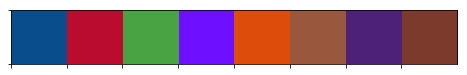

In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
flatui = ["#0a4d8c", "#ba0c2f", "#49a343", "#6E10FF", "#DE4C0B", "#99583D", "#4d2177", "#7c3a2d"]

# https://color.adobe.com/zh/create/color-wheel/?basfrom matplotlib import rc
sns.palplot(flatui)

In [2]:
def iter_loadtxt(filename, delimiter=',', skiprows=0, dtype=float):
    def iter_func():
        with open(filename, 'r') as infile:
            for _ in range(skiprows):
                next(infile)
            for line in infile:
                line = line.rstrip().split(delimiter)
                for item in line:
                    yield dtype(item)
        iter_loadtxt.rowlength = len(line)

    data = np.fromiter(iter_func(), dtype=dtype)
    data = data.reshape((-1, iter_loadtxt.rowlength))
    return data

In [3]:
MIN = 'LocalMINT_Ising_Dep_varyTemp_20_100000.csv'

In [4]:
GIBBS = 'Gibbs_Ising_Dep_20_100000.csv'

In [5]:
# error = np.genfromtxt('LocalMINT_Ising_Dep_varyTemp_50_1000000.csv',delimiter=',')

In [6]:
# gibbs = np.genfromtxt('Gibbs_Ising_Dep_50_1000000.csv',delimiter=',')

In [7]:
error = iter_loadtxt(MIN)
gibbs = iter_loadtxt(GIBBS)

In [8]:
error = error[error[:,0].argsort()[::1]]

In [9]:
gibbs = gibbs[gibbs[:,0].argsort()[::1]]

In [10]:
index = np.arange(10,100000,100)

In [11]:
error[:,-1]

array([ 0.04802284,  0.04822383,  0.04786367,  0.04791059,  0.04567521])

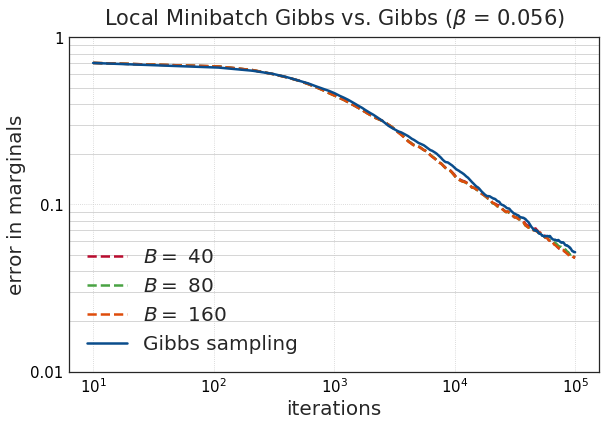

In [33]:
import matplotlib.lines as lines
from textwrap import wrap
with sns.axes_style("white"):
    fig = plt.figure(figsize=(8.5, 6))
    ax  = fig.add_subplot(111)
    plt.yscale('log')
    plt.xscale('log')
    for i in [0,1,3]:
        line = error[i,index]
        plt.plot(index,line,linestyle='--',linewidth=2.5,color=flatui[i+1],label="$B = $ {}".format(int(np.ceil(error[i,0]))))

    for i in range(gibbs.shape[0]):
        gline = gibbs[i,index]
        plt.plot(index,gline,color=flatui[i],linewidth=2.5,label="Gibbs sampling")
    plt.ylim(0.01,1)
    plt.yticks((0.01, 0.1, 1), ('0.01', '0.1', '1'), color='k', size=15)
    plt.xticks(color='k',size=15)
    plt.grid(True, which="both",axis='y')
    plt.xlabel("iterations", size=20)
    plt.ylabel("error in marginals", size=20)
    title = r'Local Minibatch Gibbs vs. Gibbs ($\beta$ = 0.056)'
    plt.title("\n".join(wrap(title,60)),size=21,y=1.02,multialignment='center')
    plt.legend(loc='lower left',fontsize=20)
    plt.grid(linestyle='dotted')
    plt.tight_layout(pad=1, w_pad=1, h_pad=1)
    
    plt.savefig("Marginals_{}.pdf".format('50'), bbox_inches='tight')
    plt.show()

In [13]:
9/1.61

5.590062111801242

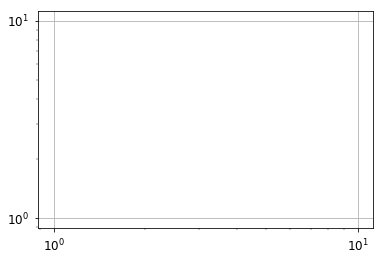

In [14]:
major_ticks = np.arange(0, 0.01, 20)
minor_ticks = np.arange(0, 0.01, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')
ax = plt.axes(xscale='log', yscale='log')
ax.grid();

In [15]:
error.shape

(5, 100001)

In [16]:
aa[aa[:,1].argsort()[::-1]]

NameError: name 'aa' is not defined

In [ ]:
error = error[error[:,1].argsort()[::-1]]

In [ ]:
error[:,0]

In [ ]:
error[:,0].argsort()[::-1]

In [ ]:
i = np.arange(1,10,2)

In [ ]:
!ls

In [32]:
line[i]

array([ 0.70710678,  0.70682394,  0.70691822,  0.70689465,  0.70676737])